<a href="https://colab.research.google.com/github/BrayanArismendi1997/Proyecto-Data-Scientist/blob/main/Proyecto_Personal_Previsi%C3%B3n_Multiseries_independiente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [121]:
!pip install skforecast

In [122]:
# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

from skforecast.ForecasterAutoregMultiSeries import ForecasterAutoregMultiSeries
from skforecast.model_selection_multiseries import backtesting_forecaster_multiseries
from skforecast.model_selection_multiseries import grid_search_forecaster_multiseries

In [123]:
# Data download
# ==============================================================================
url = (
       'https://raw.githubusercontent.com/JoaquinAmatRodrigo/skforecast/master/'
       'data/simulated_items_sales.csv'
)
data = pd.read_csv(url, sep=',')

# Data preparation
# ==============================================================================
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')
data = data.set_index('date')#Establece la columna ‘date’ como el índice del DataFrame.
data = data.asfreq('D')#Asegura que los datos estén muestreados diariamente (si no lo estaban originalmente).
data = data.sort_index()# Ordena los datos por fecha en orden ascendente.
data

,item_1,item_2,item_3
date,,,
2012-01-01,8.253175,21.047727,19.429739
2012-01-02,22.777826,26.578125,28.009863
2012-01-03,27.549099,31.751042,32.078922
2012-01-04,25.895533,24.567708,27.252276
2012-01-05,21.379238,18.191667,20.357737
...,...,...,...
2014-12-28,17.329233,18.189583,20.586030
2014-12-29,19.611623,24.539583,28.127390
2014-12-30,18.857026,17.677083,21.555782


In [124]:
# Número total de filas
total_filas = len(data)

# Número de filas que representan el 20%
filas_20_por_ciento = int(total_filas * 0.2)

# Imprime los resultados
print(f"Número total de filas: {total_filas}")
print(f"Número de filas que representan el 20%: {filas_20_por_ciento}")

Número total de filas: 1097
Número de filas que representan el 20%: 219


In [125]:
# Split train-test
# ==============================================================================
steps = filas_20_por_ciento#Esto significa que los últimos puntos de datos se utilizarán como conjunto de prueba(test), mientras que los datos restantes se usarán para entrenar el modelo.
data_train = data[:-steps]
data_test  = data[-steps:]


print(
    f"Train dates : {data_train.index.min()} --- {data_train.index.max()}   "
    f"(n={len(data_train)})"
)
print(
    f"Test dates  : {data_test.index.min()} --- {data_train.index.max()}   "
    f"(n={len(data_test)})"
)



Train dates : 2012-01-01 00:00:00 --- 2014-05-27 00:00:00   (n=878)
Test dates  : 2014-05-28 00:00:00 --- 2014-05-27 00:00:00   (n=219)


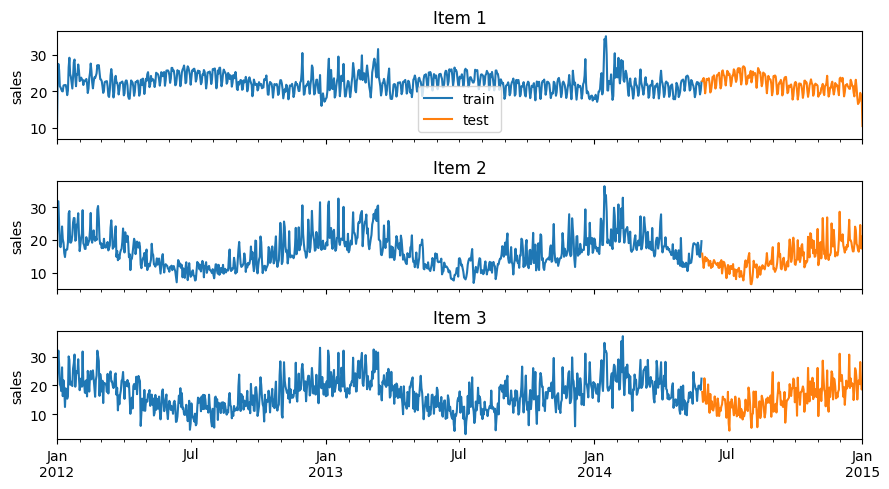

In [126]:
# Plot time series
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(9, 5), sharex=True)

data_train['item_1'].plot(label='train', ax=axes[0])
data_test['item_1'].plot(label='test', ax=axes[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('sales')
axes[0].set_title('Item 1')
axes[0].legend()

data_train['item_2'].plot(label='train', ax=axes[1])
data_test['item_2'].plot(label='test', ax=axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('sales')
axes[1].set_title('Item 2')

data_train['item_3'].plot(label='train', ax=axes[2])
data_test['item_3'].plot(label='test', ax=axes[2])
axes[2].set_xlabel('')
axes[2].set_ylabel('sales')
axes[2].set_title('Item 3')

fig.tight_layout()
plt.show();

In [127]:
# Create and fit forecaster multi series
# ==============================================================================
forecaster = ForecasterAutoregMultiSeries(
                 regressor          = Ridge(random_state=123),
                 lags               = filas_20_por_ciento,
                 transformer_series = None,
                 transformer_exog   = None,
                 weight_func        = None,
                 series_weights     = None,
                 forecaster_id      = None
             )

forecaster.fit(series=data_train)
forecaster

ForecasterAutoregMultiSeries 
Regressor: Ridge(random_state=123) 
Lags: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219] 
Transformer for series: None 
Transfo

#Backtesting de múltiples series

In [128]:
# Backtesting Multi Series
# ==============================================================================
metrics_levels, backtest_predictions = backtesting_forecaster_multiseries(
                                           forecaster            = forecaster,
                                           series                = data,
                                           exog                  = None,
                                           levels                = None,
                                           steps                 = filas_20_por_ciento,
                                           metric                = 'mean_absolute_error',
                                           initial_train_size    = len(data_train),
                                           fixed_train_size      = True,
                                           gap                   = 0,
                                           allow_incomplete_fold = True,
                                           refit                 = True,
                                           n_jobs                = 'auto',
                                           verbose               = False,
                                           show_progress         = True
                                       )

print("Backtest metrics")
display(metrics_levels)
print("")
print("Backtest predictions")
backtest_predictions

  0%|          | 0/1 [00:00<?, ?it/s]

Backtest metrics


,levels,mean_absolute_error
0,item_1,1.726502
1,item_2,4.172203
2,item_3,3.745130



Backtest predictions


,item_1,item_2,item_3
2014-05-28,21.774418,15.503310,16.881247
2014-05-29,22.873422,17.028147,18.277120
2014-05-30,24.240051,17.409833,19.466668
2014-05-31,23.524155,15.722256,17.112743
2014-06-01,20.977070,16.661955,17.704330
...,...,...,...
2014-12-28,18.899921,19.342822,16.539272
2014-12-29,20.214225,20.477332,17.623604
2014-12-30,22.037749,20.488081,17.579928
2014-12-31,21.627326,19.099959,15.113220


In [129]:
# Ajustar el modelo con el conjunto de datos completo
forecaster.fit(series=data)

# Predecir pasos adicionales
steps1=120
predictions_future = forecaster.predict(steps=steps1)


print("Predictions for the next steps")
print(predictions_future)

Predictions for the next steps
               item_1     item_2     item_3
2015-01-02  16.800052  21.515760  23.637475
2015-01-03  18.591192  19.865217  20.578021
2015-01-04  17.868082  21.578069  22.194628
2015-01-05  18.249349  23.137190  23.141828
2015-01-06  18.883943  19.105960  19.877765
...               ...        ...        ...
2015-04-27  19.599806  18.227048  15.722849
2015-04-28  21.280199  18.506620  16.563812
2015-04-29  21.532948  18.520360  15.797834
2015-04-30  20.611253  19.389305  16.515008
2015-05-01  20.534057  17.927726  15.745787

[120 rows x 3 columns]


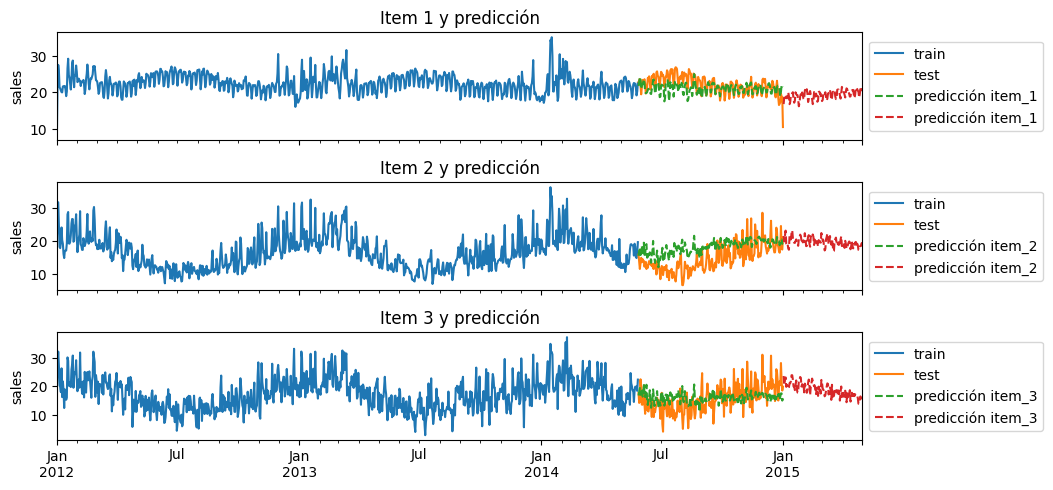

In [130]:
# Plot time series
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(9, 5), sharex=True)

data_train['item_1'].plot(label='train', ax=axes[0])
data_test['item_1'].plot(label='test', ax=axes[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('sales')
axes[0].set_title('Item 1')
axes[0].legend()

data_train['item_2'].plot(label='train', ax=axes[1])
data_test['item_2'].plot(label='test', ax=axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('sales')
axes[1].set_title('Item 2')

data_train['item_3'].plot(label='train', ax=axes[2])
data_test['item_3'].plot(label='test', ax=axes[2])
axes[2].set_xlabel('')
axes[2].set_ylabel('sales')
axes[2].set_title('Item 3')

fig.tight_layout()

# Agregar las predicciones al gráfico existente
backtest_predictions['item_1'].plot(label='predicción item_1', linestyle='--', ax=axes[0])
backtest_predictions['item_2'].plot(label='predicción item_2', linestyle='--', ax=axes[1])
backtest_predictions['item_3'].plot(label='predicción item_3', linestyle='--', ax=axes[2])

predictions_future
# Agregar las predicciones futuras al gráfico existente
predictions_future['item_1'].plot(label='predicción item_1', linestyle='--', ax=axes[0])
predictions_future['item_2'].plot(label='predicción item_2', linestyle='--', ax=axes[1])
predictions_future['item_3'].plot(label='predicción item_3', linestyle='--', ax=axes[2])


# Asegúrate de ajustar los títulos y leyendas según tus necesidades
axes[0].set_title('Item 1 y predicción')
axes[1].set_title('Item 2 y predicción')
axes[2].set_title('Item 3 y predicción')
# Agregar las leyendas y ajustar su posición
axes[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[1].legend(loc='center left', bbox_to_anchor=(1, 0.5))
axes[2].legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Muestra el gráfico actualizado
plt.show()

#Variables exógenas en multiseries.

In [131]:
# Generate exogenous variable month
# ==============================================================================
data_exog = data.copy()
data_exog['month'] = data_exog.index.month

# Split data into train-val-test
# ==============================================================================
end_train = data_train.index.max()
data_exog_train = data_exog.loc[:end_train, :].copy()
data_exog_test  = data_exog.loc[end_train:, :].copy()

data_exog_train

,item_1,item_2,item_3,month
date,,,,
2012-01-01,8.253175,21.047727,19.429739,1
2012-01-02,22.777826,26.578125,28.009863,1
2012-01-03,27.549099,31.751042,32.078922,1
2012-01-04,25.895533,24.567708,27.252276,1
2012-01-05,21.379238,18.191667,20.357737,1
...,...,...,...,...
2014-05-23,22.423148,18.339583,19.947860,5
2014-05-24,21.257406,15.087500,19.641262,5
2014-05-25,19.178378,14.820833,19.999694,5


In [132]:
# Create and fit forecaster multi series
# ==============================================================================
forecaster2 = ForecasterAutoregMultiSeries(
                 regressor = Ridge(random_state=123),
                 lags      = filas_20_por_ciento
             )

forecaster.fit(
    series = data_exog_train[['item_1', 'item_2', 'item_3']],
    exog   = data_exog_train[['month']]
)
forecaster2

ForecasterAutoregMultiSeries 
Regressor: Ridge(random_state=123) 
Lags: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219] 
Transformer for series: StandardScale

In [133]:
# Backtesting Multi Series with exog
# ==============================================================================
metrics_levels2, backtest_predictions2 = backtesting_forecaster_multiseries(
                                           forecaster            = forecaster,
                                           series                = data_exog[['item_1', 'item_2', 'item_3']],
                                           exog                  = data_exog[['month']],
                                           levels                = None,
                                           steps                 = filas_20_por_ciento+30,
                                           metric                = 'mean_absolute_error',
                                           initial_train_size    = len(data_exog_train),
                                           fixed_train_size      = True,
                                           gap                   = 0,
                                           allow_incomplete_fold = True,
                                           refit                 = True,
                                           n_jobs                = 'auto',
                                           verbose               = False,
                                           show_progress         = True
                                       )

print("Backtest metrics")
display(metrics_levels2)
print("")
print("Backtest predictions with exogenous variables")
backtest_predictions2

  0%|          | 0/1 [00:00<?, ?it/s]

Backtest metrics


,levels,mean_absolute_error
0,item_1,1.908137
1,item_2,3.995404
2,item_3,3.826281



Backtest predictions with exogenous variables


,item_1,item_2,item_3
2014-05-28,21.802774,15.503586,16.896031
2014-05-29,22.922517,17.024091,18.301158
2014-05-30,24.308545,17.426364,19.525289
2014-05-31,23.609919,15.756912,17.190659
2014-06-01,21.042139,16.676230,17.756862
...,...,...,...
2014-12-28,17.619755,18.116539,15.612366
2014-12-29,18.920444,19.222099,16.675184
2014-12-30,20.730351,19.216835,16.618668
2014-12-31,20.317627,17.833087,14.160149


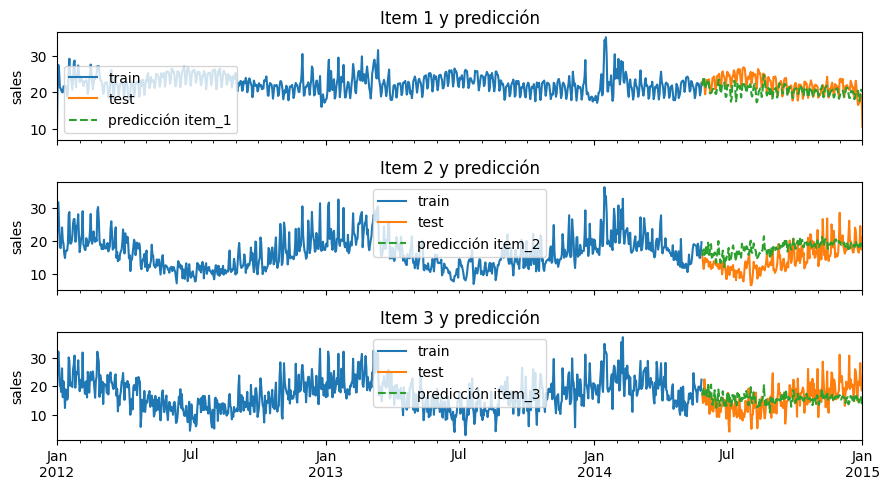

In [134]:
# Plot time series
# ==============================================================================
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(9, 5), sharex=True)

data_train['item_1'].plot(label='train', ax=axes[0])
data_test['item_1'].plot(label='test', ax=axes[0])
axes[0].set_xlabel('')
axes[0].set_ylabel('sales')
axes[0].set_title('Item 1')
axes[0].legend()

data_train['item_2'].plot(label='train', ax=axes[1])
data_test['item_2'].plot(label='test', ax=axes[1])
axes[1].set_xlabel('')
axes[1].set_ylabel('sales')
axes[1].set_title('Item 2')

data_train['item_3'].plot(label='train', ax=axes[2])
data_test['item_3'].plot(label='test', ax=axes[2])
axes[2].set_xlabel('')
axes[2].set_ylabel('sales')
axes[2].set_title('Item 3')

fig.tight_layout()

# Agregar las predicciones al gráfico existente
backtest_predictions2['item_1'].plot(label='predicción item_1', linestyle='--', ax=axes[0])
backtest_predictions2['item_2'].plot(label='predicción item_2', linestyle='--', ax=axes[1])
backtest_predictions2['item_3'].plot(label='predicción item_3', linestyle='--', ax=axes[2])

# Asegúrate de ajustar los títulos y leyendas según tus necesidades
axes[0].set_title('Item 1 y predicción')
axes[1].set_title('Item 2 y predicción')
axes[2].set_title('Item 3 y predicción')
axes[0].legend()
axes[1].legend()
axes[2].legend()

# Muestra el gráfico actualizado
plt.show()

In [135]:
import pandas as pd


# Concatenar los DataFrames horizontalmente
resultados_concatenados = pd.concat([metrics_levels, metrics_levels2], axis=1)

# Mostrar los resultados concatenados
print("Backtest metrics (concatenados):")
display(resultados_concatenados)


Backtest metrics (concatenados):


,levels,mean_absolute_error,levels,mean_absolute_error
0,item_1,1.726502,item_1,1.908137
1,item_2,4.172203,item_2,3.995404
2,item_3,3.745130,item_3,3.826281
